In [56]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [7]:
titanic.pivot_table("age", "class", aggfunc="count")

,age
class,
First,186
Second,173
Third,355


In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
titanic.pivot_table("survived", "deck")

,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000


In [46]:
titanic.pivot_table("survived", pd.cut(titanic["fare"], 4))

,survived
fare,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [54]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


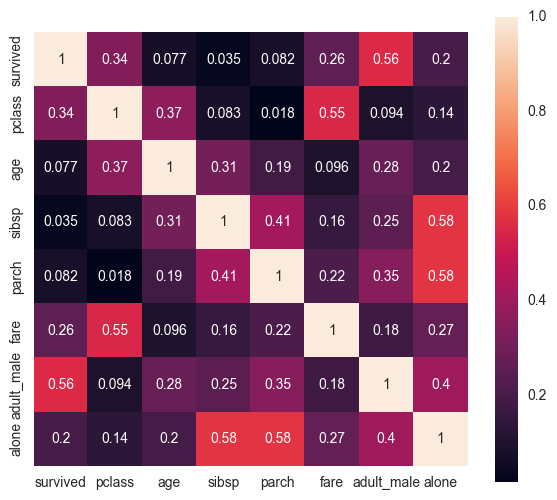

In [63]:
plt.figure(figsize=(7, 6))
sns.heatmap(titanic.corr().abs(), annot=True, square=True)

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
x = pd.concat([pd.get_dummies(titanic.pclass, prefix="class"), titanic.age], axis=1)

In [90]:
x.corr()

,class_1,class_2,class_3,age
class_1,1.000000,-0.288585,-0.626738,0.348941
class_2,-0.288585,1.000000,-0.565210,0.006954
class_3,-0.626738,-0.565210,1.000000,-0.312271
age,0.348941,0.006954,-0.312271,1.000000


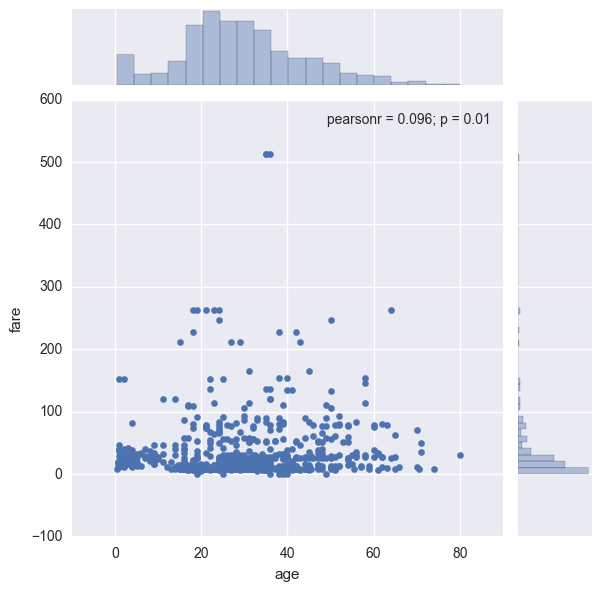

In [91]:
sns.jointplot(data=titanic, x="age", y="fare")

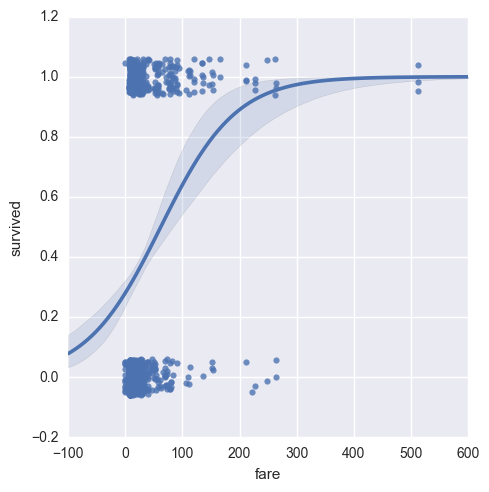

In [114]:
sns.lmplot(data=titanic, x="fare", y="survived", logistic=True, y_jitter=0.06)

Może warto zobaczyć czy niskie fare wrzucic do jednego koszyka a wysokie do innego

In [111]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

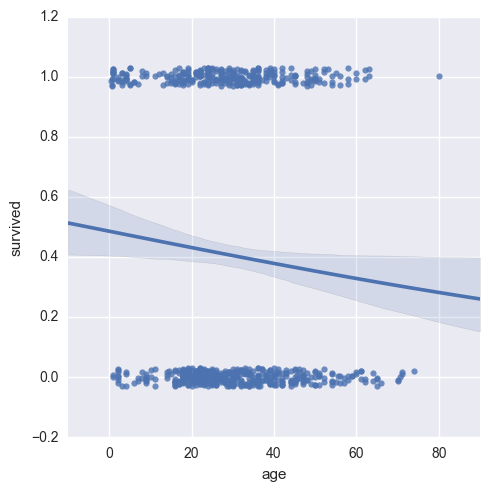

In [109]:
sns.lmplot(data=titanic, x="age", y="survived", logistic=True, y_jitter=0.03)

In [101]:
titanic[["age", "survived", "fare"]].corr()

,age,survived,fare
age,1.000000,-0.077221,0.096067
survived,-0.077221,1.000000,0.257307
fare,0.096067,0.257307,1.000000


In [102]:
len(titanic)

891

In [103]:
titanic["noise"] = np.random.normal(scale=50, size=len(titanic))

In [105]:
titanic[["age", "survived", "fare", "noise", "adult_male"]].corr()

,age,survived,fare,noise,adult_male
age,1.000000,-0.077221,0.096067,-0.017420,0.280328
survived,-0.077221,1.000000,0.257307,0.055232,-0.557080
fare,0.096067,0.257307,1.000000,0.019113,-0.182024
noise,-0.017420,0.055232,0.019113,1.000000,-0.028667
adult_male,0.280328,-0.557080,-0.182024,-0.028667,1.000000


In [106]:
titanic.pivot_table("survived", index="sex", columns="adult_male")

adult_male,False,True
sex,,
female,0.742038,NaN
male,0.525000,0.163873


In [108]:
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [225]:
data = pd.Series([1,1,6,13,13,14,14,14,15,15,16,18,18,18,19])
dlab = pd.Series(["A" for x in data])
dat2 = pd.Series([1,1,6,10,13,13,14,14,14,15,15,16,18,18,18,19])
dla2 = pd.Series(["B" for x in dat2])

data = pd.concat([data, dat2]).reset_index(drop=True)
labels = pd.concat([dlab, dla2]).reset_index(drop=True)

In [226]:
df = pd.concat([data, labels], axis=1)
df.columns=["data", "labels"]
df.head(3)

,data,labels
0,1,A
1,1,A
2,6,A


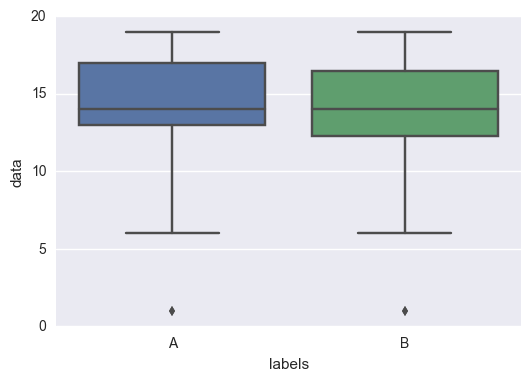

In [231]:
sns.boxplot(data=df, x="labels", y="data", whis=2)

In [228]:
import scipy.stats as stats